<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
This is the project as a part of KDD (CS 831) course.
The project is about predicting whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we will use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/uciml/adult-census-income">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
This is supervised Classification as the dataset contains the labels in the colum "income" which we have to predict and the labels are discrete and binary. 
</p></li>  
</ul>

</div>

## Step **1** : Load dataset and python libraries
[link text](https://)


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/MyDrive/vndn_1/adult.csv"
data = pd.read_csv(path)

In [4]:
# Importing dataset
# data = pd.read_csv('adult.csv')

**bold text**## Step 1: Descriptive analysis

In [5]:
# Preview dataset
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Shape (Rows and Columns) of dataset
print('Rows: {} \nColumns: {}'.format(data.shape[0], data.shape[1]))

Rows: 32561 
Columns: 15


In [8]:
# Printing dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
# Statistical summary of dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
# Checking if there is any null values
round((data.isnull().sum() / data.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [11]:
# Checking if there is '?' in dataset
round((data.isin(['?']).sum() / data.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [12]:
# Checking the counts of label categories
income = data['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.92 %
>50K     24.08 %
Name: income, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The data contains missing values '?' which we will  preprocess.
</p></li>    

<li><p style="font-family:verdana;">
The data is not balanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>





## Step 2: Data Analysis

### 2.1: Univariate Analysis

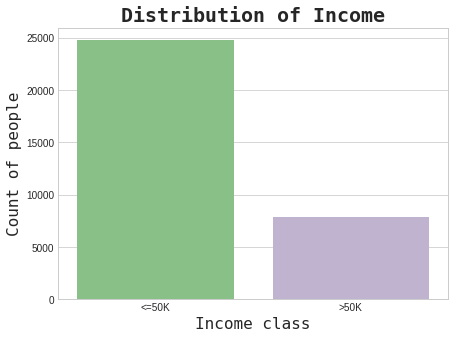

In [13]:
# Creating a barplot for 'Income'
income = data['income'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(7, 5))
sns.barplot(income.index, income.values, palette='Accent')
plt.title('Distribution of Income', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Income class', fontdict={'fontname': 'Monospace', 'fontsize': 16})
plt.ylabel('Count of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 16})
plt.tick_params(labelsize=10)
plt.show()

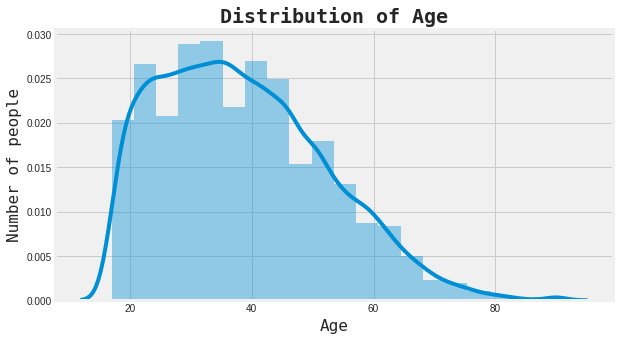

In [14]:
# Creating a distribution plot for 'Age'
age = data['age'].value_counts()

plt.figure(figsize=(10, 5))
plt.style.use('fivethirtyeight')
sns.distplot(data['age'], bins=20)
plt.title('Distribution of Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 16})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 16})
plt.tick_params(labelsize=10)
plt.show()

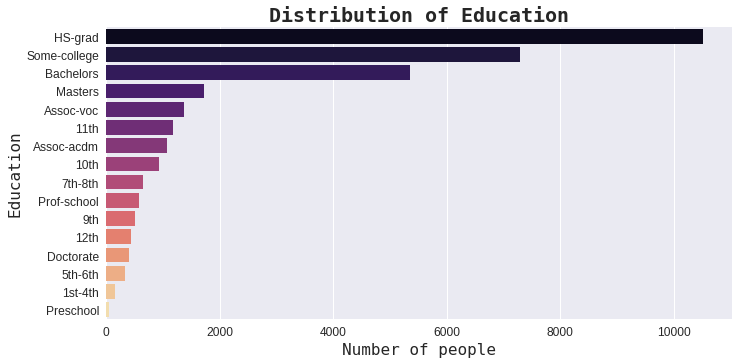

In [15]:
# Creating a barplot for 'Education'
edu = data['education'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(10, 5))
sns.barplot(edu.values, edu.index, palette='magma')
plt.title('Distribution of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 16})
plt.ylabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 16})
plt.tick_params(labelsize=12)
plt.show()

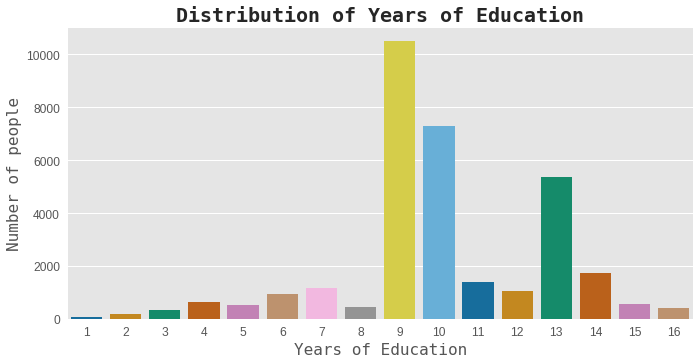

In [16]:
# Creating a barplot for 'Years of Education'
edu_num = data['education.num'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(edu_num.index, edu_num.values, palette='colorblind')
plt.title('Distribution of Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 16})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 16})
plt.tick_params(labelsize=12)
plt.show()

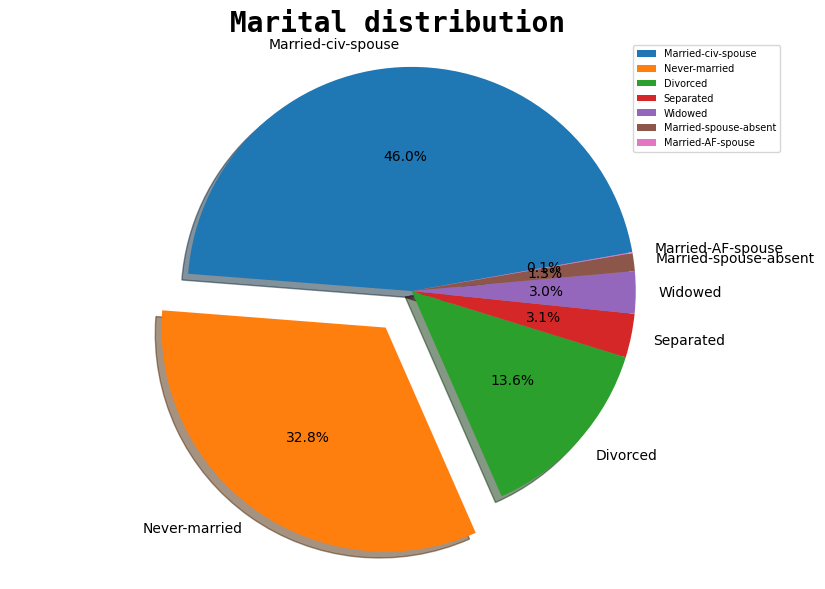

In [17]:
# Creating a pie chart for 'Marital status'
marital = data['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

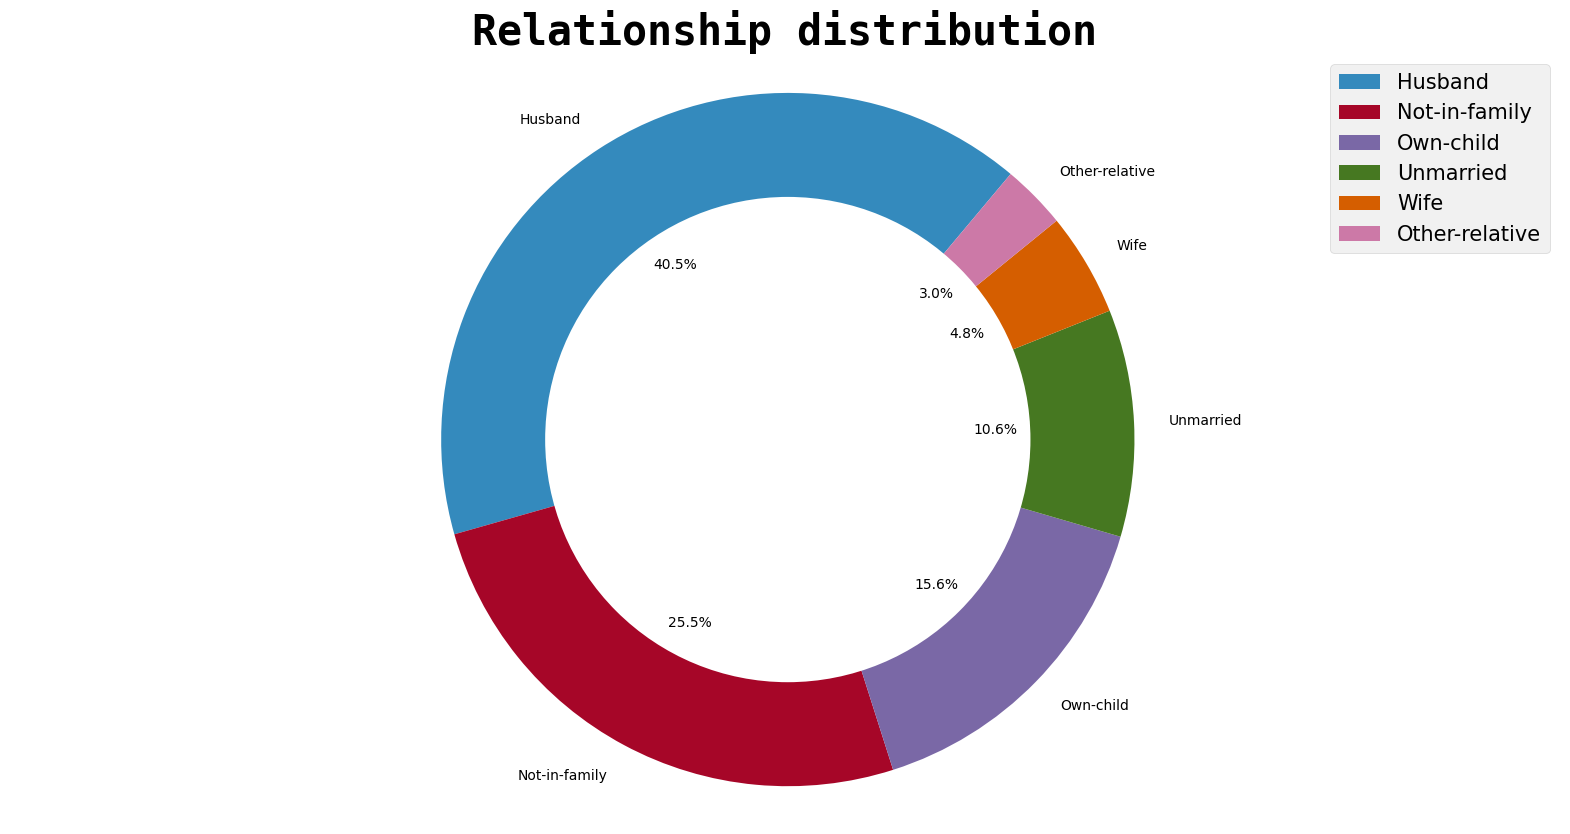

In [18]:
# Creating a donut chart for 'Age'
relation = data['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

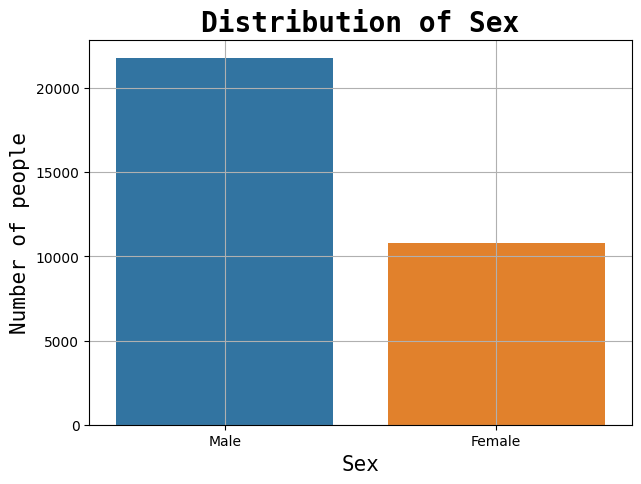

In [19]:
# Creating a barplot for 'Sex'
sex = data['sex'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
sns.barplot(sex.index, sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.grid()
plt.show()

In [20]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


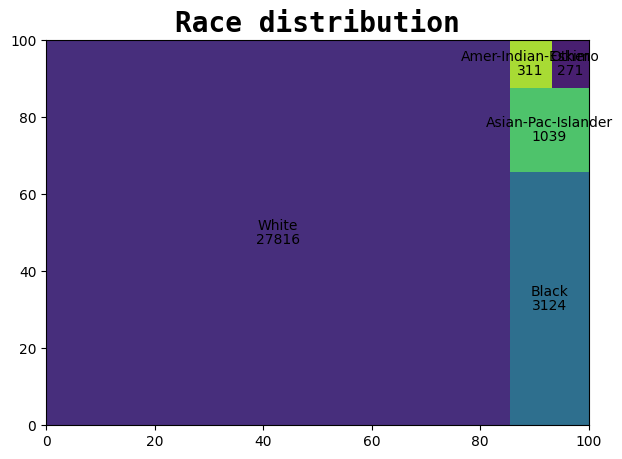

In [21]:
# Creating a Treemap for 'Race'
import squarify
race = data['race'].value_counts()

plt.style.use('default')
plt.figure(figsize=(7, 5))
squarify.plot(sizes=race.values, label=race.index, value=race.values)
plt.title('Race distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.show()

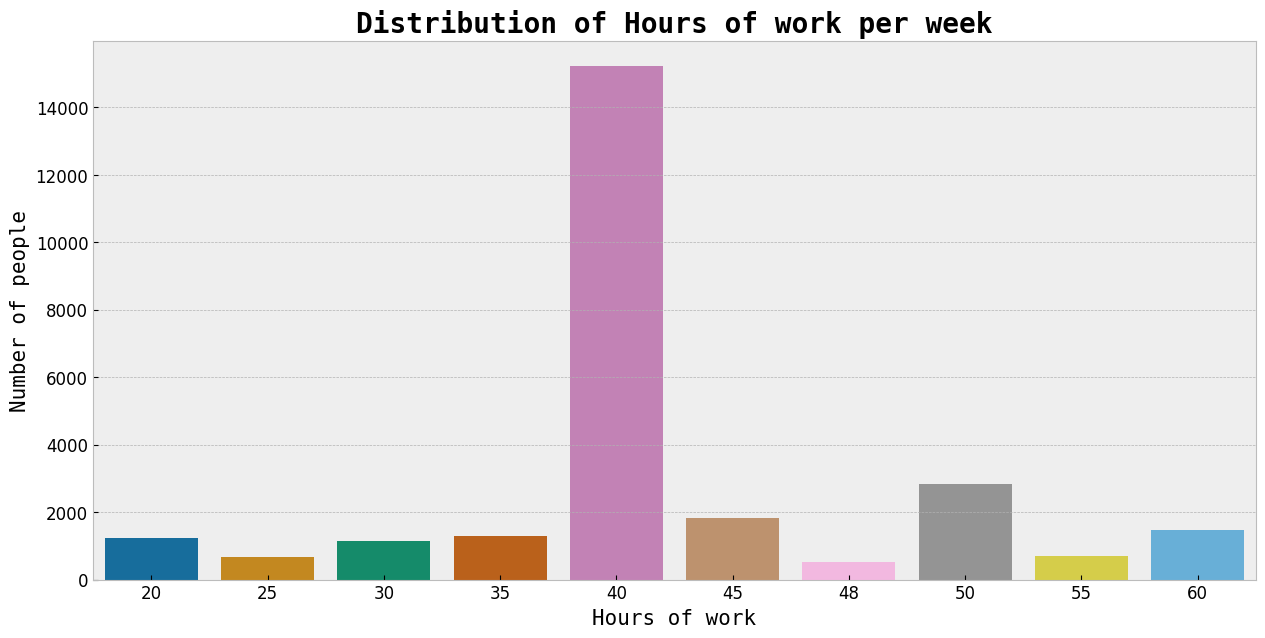

In [22]:
# Creating a barplot for 'Hours per week'
hours = data['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(hours.index, hours.values, palette='colorblind')
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

### 2.2 Bivariate Analysis

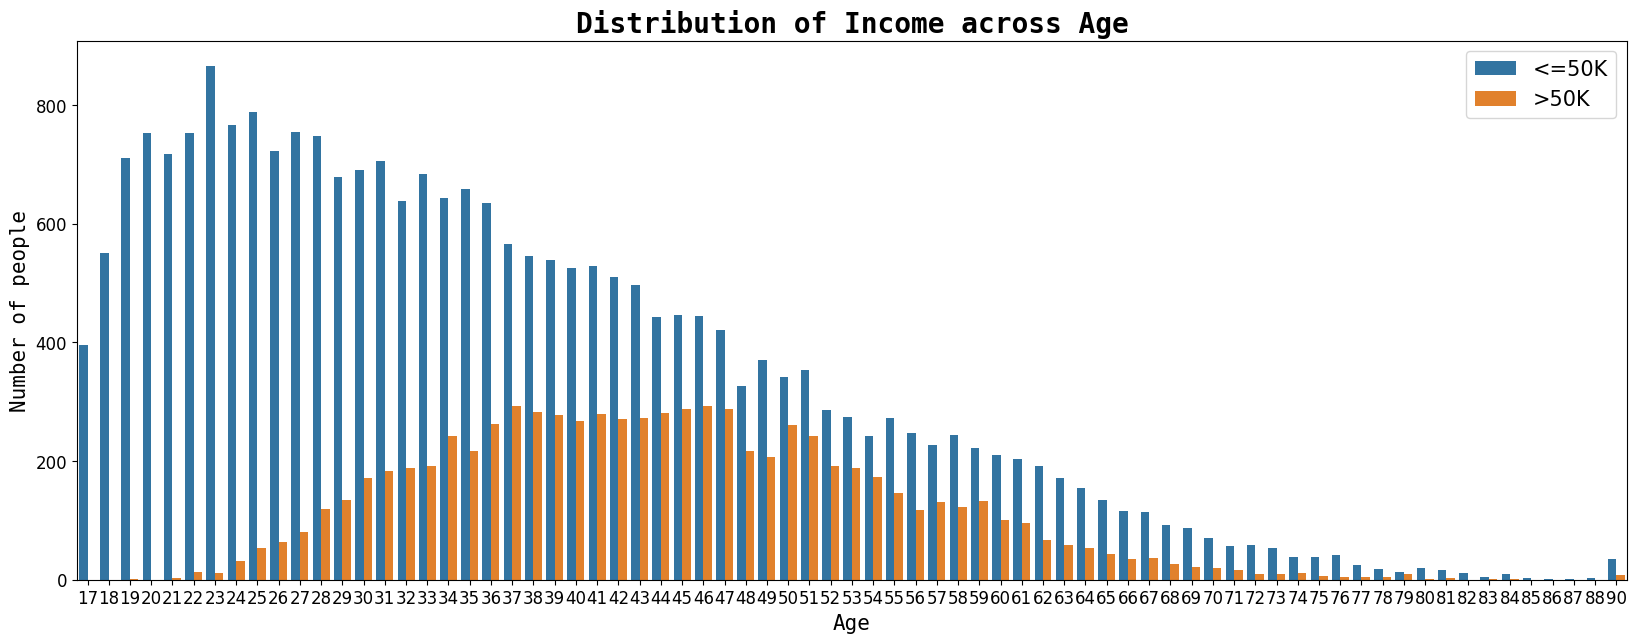

In [23]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['age'], hue=data['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

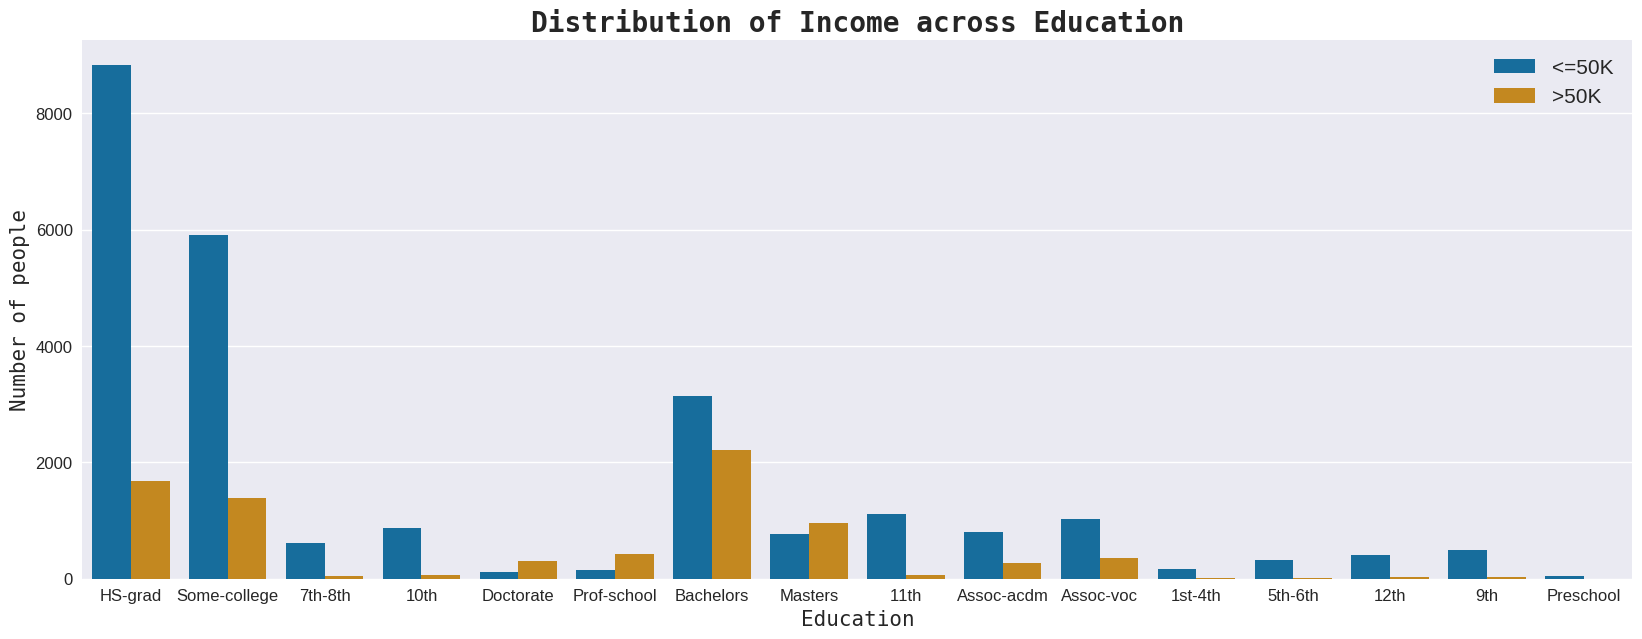

In [24]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['education'],
              hue=data['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

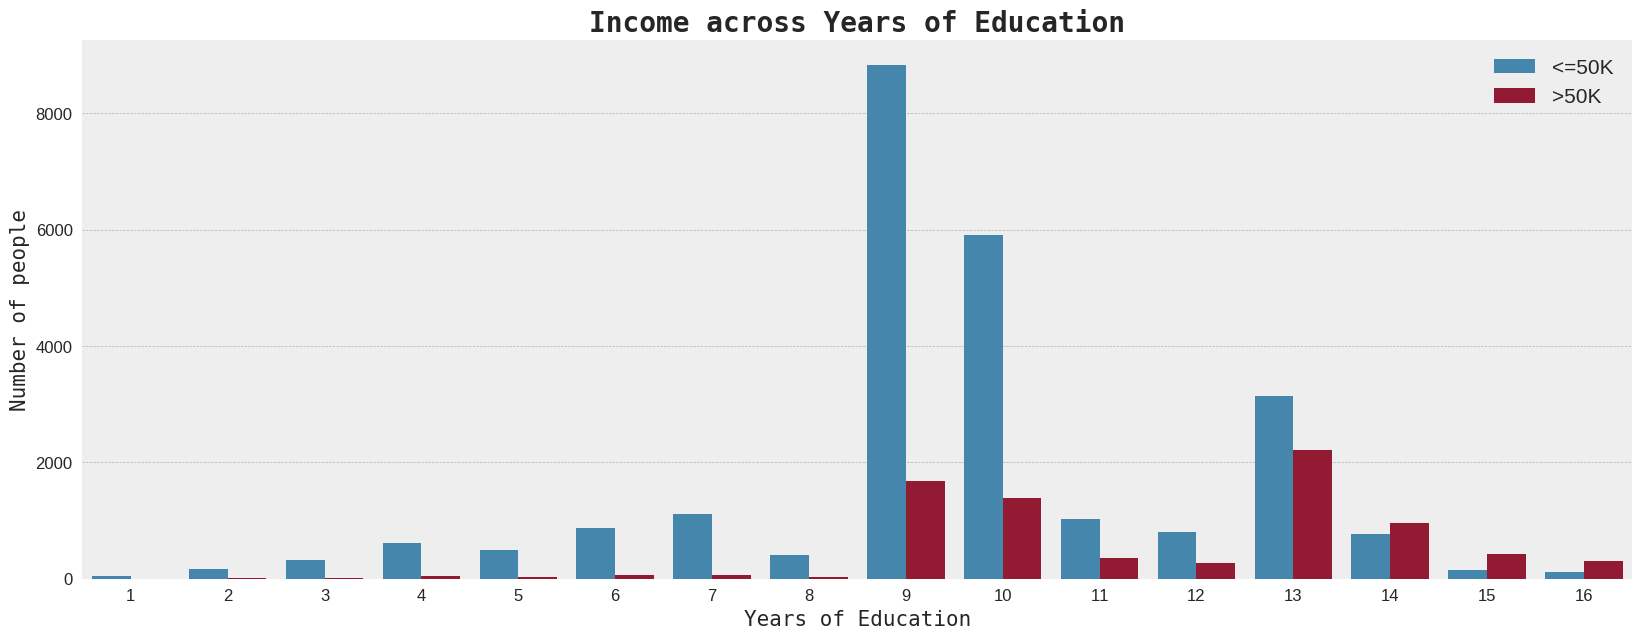

In [25]:
# Creating a countplot of income across years of education
plt.style.use('bmh')
plt.figure(figsize=(20, 7))
sns.countplot(data['education.num'],
              hue=data['income'])
plt.title('Income across Years of Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Years of Education', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.savefig('bi2.png')
plt.show()

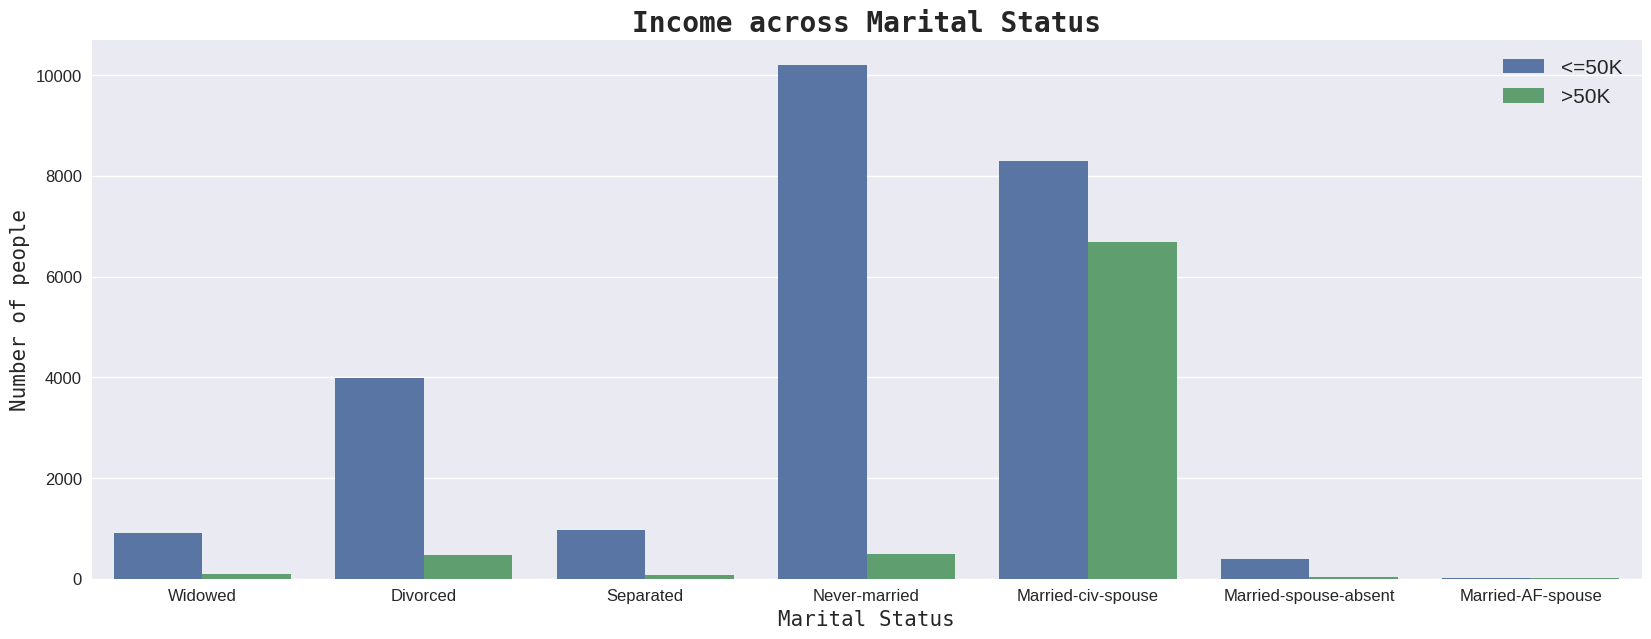

In [26]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['marital.status'], hue=data['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

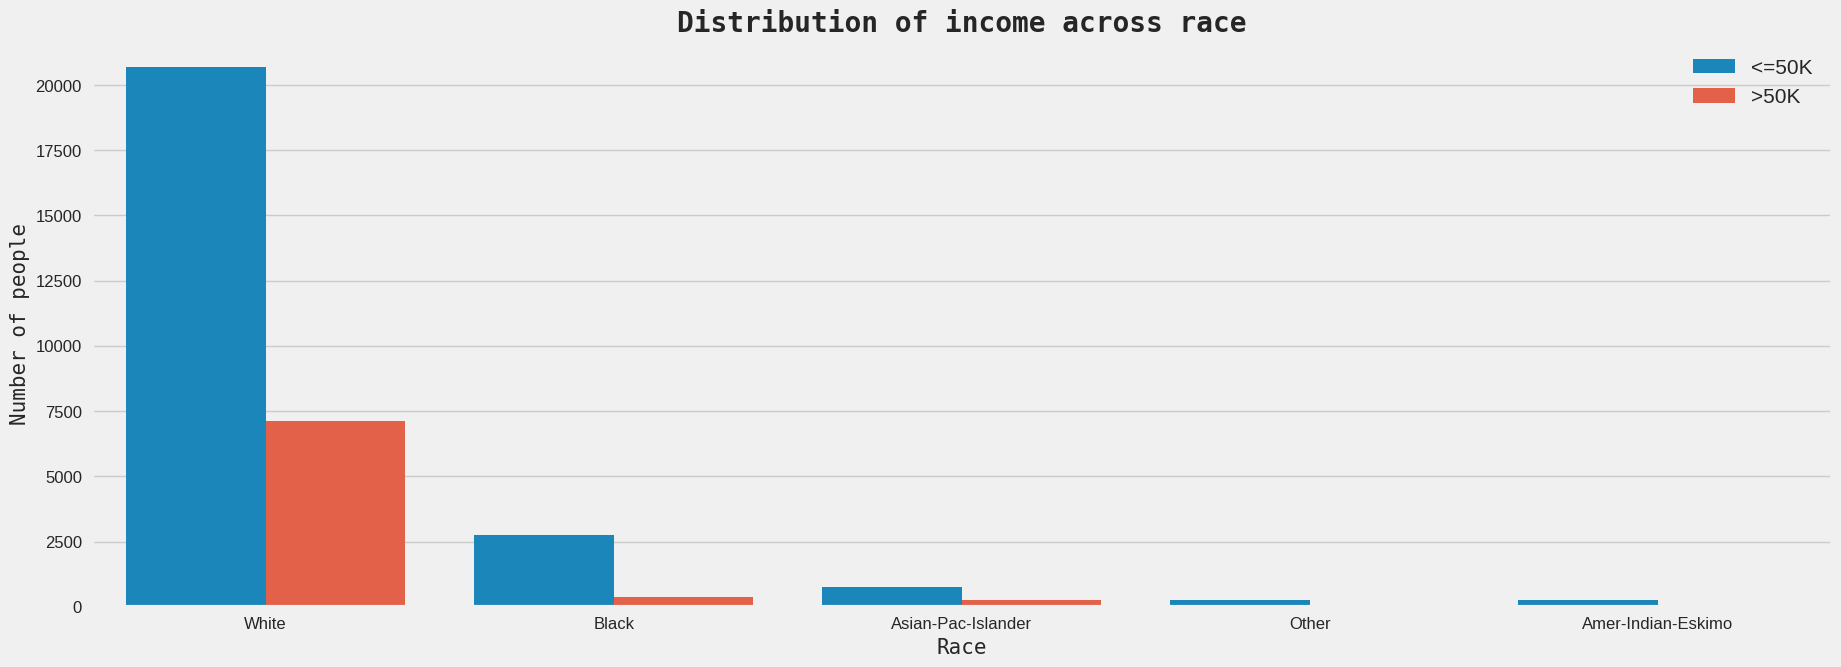

In [27]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(data['race'], hue=data['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

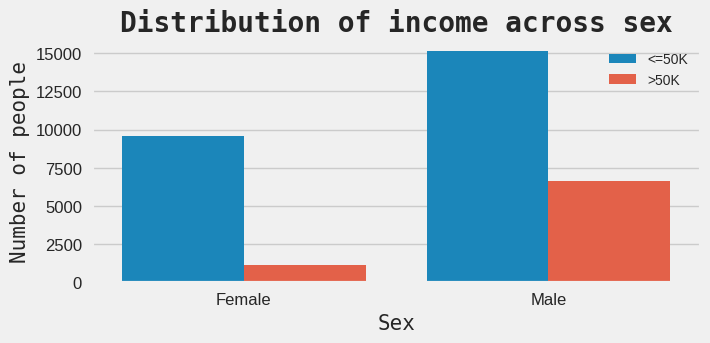

In [28]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(data['sex'], hue=data['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()

### 2.3: Multivariate Analysis

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
data['income'] = le.fit_transform(data['income'])

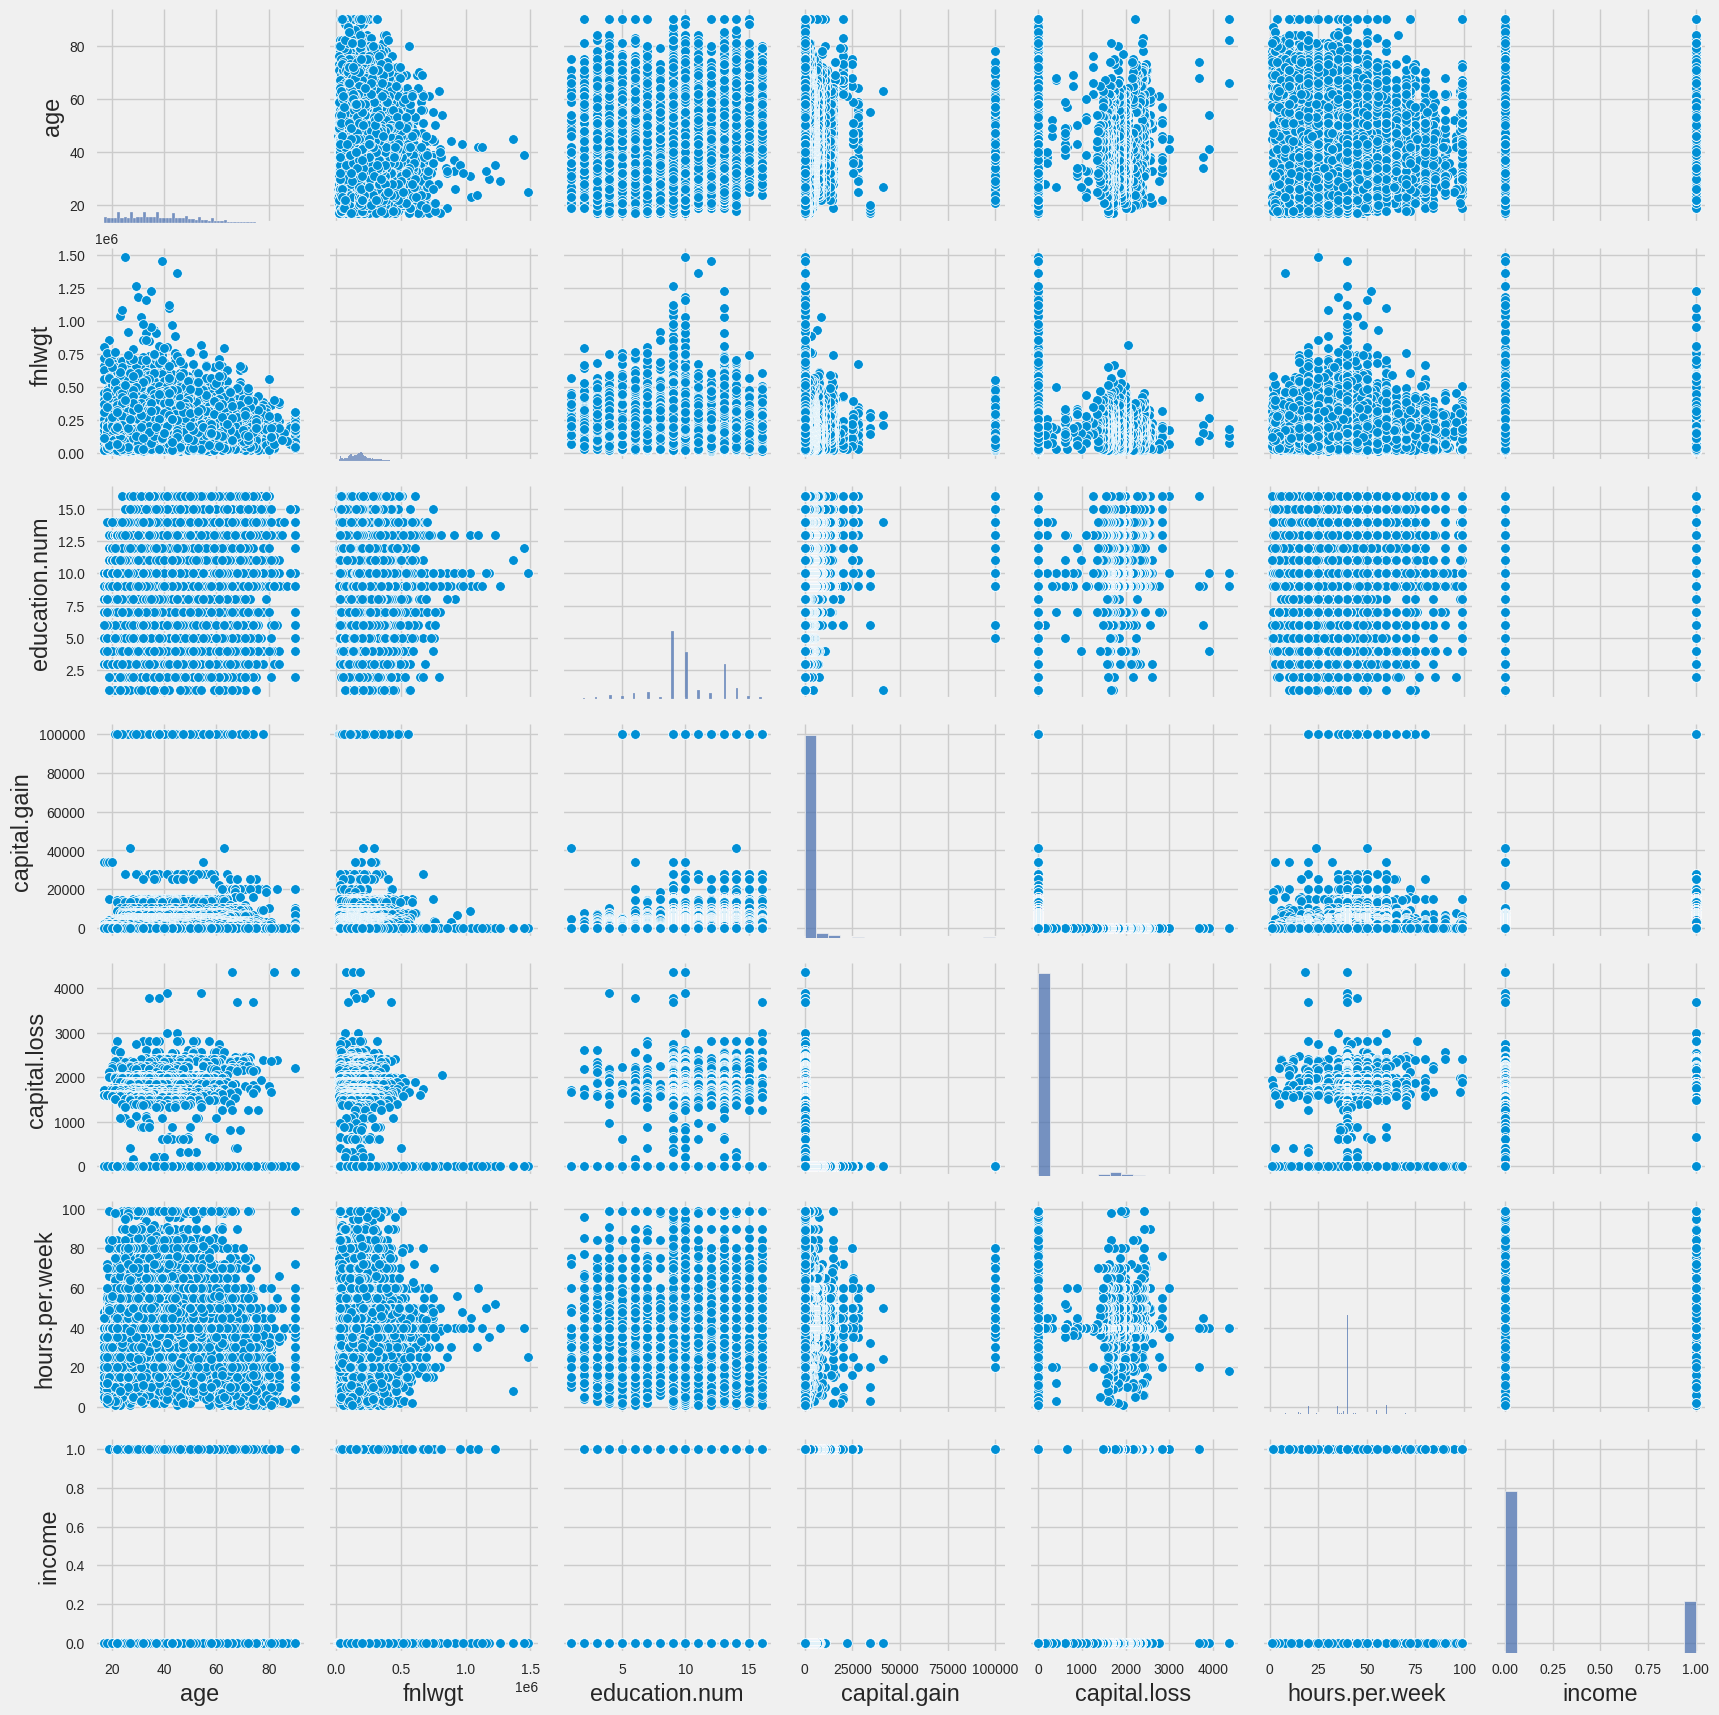

In [31]:
# Creating a pairplot of dataset
sns.pairplot(data)
plt.savefig('multi1.png')
plt.show()

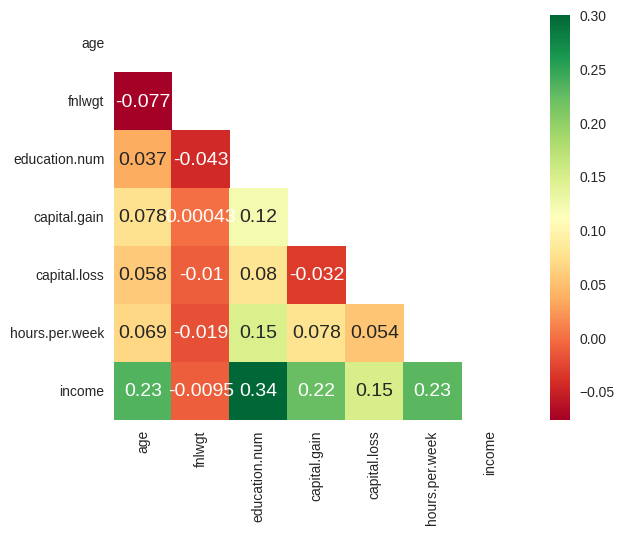

In [32]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

## Step 3: Data Preprocessing

### 3.1: Replacing '?' values in the dataset

In [33]:
dataset = data.replace('?', np.nan)

In [34]:
# Checking null values
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [35]:
columns_null = ['workclass', 'occupation', 'native.country']

In [36]:
#Filling values using the specified model
for col in columns_null:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

### 3.2: Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
#Converting the named categorical labels to one-hot encoded format
for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])


### 3.3: Feature Selection

In [39]:
X = dataset.drop('income', axis=1)
Y = dataset['income']

In [40]:
#Fitting a random number of decision trees on various sub-samples of the dataset
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [41]:
selector.fit(X, Y)

ExtraTreesClassifier(random_state=42)

In [42]:
feature_imp = selector.feature_importances_

In [43]:
#Calculating the importance value for features
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
dtypes: int64(14)
memory usage: 3.5 MB


In [45]:
#Dropping lesser significant features 
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)

In [46]:
X.head()

,age,fnlwgt,education.num,marital.status,occupation,relationship,capital.gain,hours.per.week
0,90,77053,9,6,9,1,0,40
1,82,132870,9,6,3,1,0,18
2,66,186061,10,6,9,4,0,40
3,54,140359,4,0,6,4,0,40
4,41,264663,10,5,9,3,0,40


### 3.4: Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
#Standardizing features
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [49]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: income, dtype: object

In [55]:
#Oversampling the minority classes by picking samples at random with replacement
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [56]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [57]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [58]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: income, dtype: object

### 3.6: Creating a train test split

In [59]:
#Splitting for training
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [60]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (39552, 8)
X_test shape: (9888, 8)
Y_train shape: (39552,)
Y_test shape: (9888,)


## Step 4: Data Modelling

### 4.1: Support Vector Classifier

In [61]:
from sklearn.svm import SVC
svc = SVC(random_state=42)

In [62]:
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [63]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(svc, open(filename, 'wb'))

In [64]:
Y_pred_svc = svc.predict(X_test)



### 4.2: Random Forest Classifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)

In [66]:
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [67]:
Y_pred_ran_for = ran_for.predict(X_test)

## Step 5: Model Evaluation

In [68]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [69]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 81.58
F1 score: 82.56


In [70]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.6
F1 score: 92.93




## Step 6: Hyperparameter Tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)] #returns evenly spaced samples over the specified interval
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [73]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [74]:
rf_tuned = RandomForestClassifier(random_state=42)

In [75]:
#Randomized search on hyperparameters
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [76]:
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [77]:
rf_cv.best_score_

0.9131271105332539

In [78]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [79]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [80]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [81]:
Y_pred_rf_best = rf_best.predict(X_test)

In [82]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 92.77
F1 score: 93.08


In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

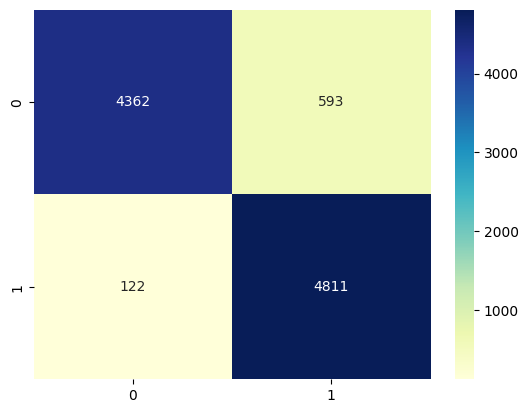

In [84]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu') #fmt = .2%
plt.savefig('heatmap.png')
plt.show()

In [85]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      4955
           1       0.89      0.98      0.93      4933

    accuracy                           0.93      9888
   macro avg       0.93      0.93      0.93      9888
weighted avg       0.93      0.93      0.93      9888



<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like knn classifier, support vector classifier, decision tree classifier and random forest classifier classifier.
</p></li>    

<li><p style="font-family:verdana;">
A hyperparameter tuned random forest classifier gives the highest accuracy score of 92.77 and f1 score of 93.08.
</p></li>    

</ul>

</div>